---
# Project Probability
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
data = pd.read_csv("insurance.csv")

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


---
## Langkah 1 - Analisa Descriptive Statistic

### 1. Berapa rata rata umur pada data tersebut?

In [36]:
mean_age = data["age"].mean()
print(f"rata-rata umur pengguna insurance yaitu :{mean_age}")

rata-rata umur pengguna insurance yaitu :39.20702541106129


### 2. Berapa rata rata nilai BMI dari yang merokok?

In [4]:
mean_bmi_perokok = data[(data['smoker'] == 'yes')]['bmi'].mean()
print(f"rata-rata bmi perokok yaitu :{mean_bmi_perokok}")

rata-rata bmi perokok yaitu :30.708448905109503


### 3. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [35]:
mean_male_perokok = data[(data['smoker'] == 'yes') & (data['sex'] == 'male')]['age'].mean()
mean_female_perokok = data[(data['smoker'] == 'yes') & (data['sex'] == 'female')]['age'].mean()

print(f"rata-rata umur pria perokok yaitu :{mean_male_perokok}")
print(f"rata-rata umur wanita perokok yaitu :{mean_female_perokok}")

if mean_male_perokok < mean_female_perokok:
    print("Rata-rata umur pria perokok lebih kecil dari wanita perokok")
elif mean_male_perokok > mean_female_perokok:
    print("Rata-rata umur pria perokok lebih besar dari wanita perokok")
else:
    print("Rata-rata umur pria perokok sama dengan wanita perokok")

rata-rata umur pria perokok yaitu :38.44654088050314
rata-rata umur wanita perokok yaitu :38.608695652173914
Rata-rata umur pria perokok lebih kecil dari wanita perokok


### 4. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [6]:
mean_charges_perokok = data[(data['smoker'] == 'yes')]['charges'].mean()
mean_charges_nonperokok = data[(data['smoker'] == 'no')]['charges'].mean()

print(f"rata-rata tagihan perokok yaitu :{mean_charges_perokok}")
print(f"rata-rata tagihan non-perokok yaitu :{mean_charges_nonperokok}")

if mean_charges_perokok < mean_charges_nonperokok:
    print("Rata-rata tagihan perokok lebih kecil dari non-perokok")
elif mean_charges_perokok > mean_charges_nonperokok:
    print("Rata-rata tagihan perokok lebih besar dari non-perokok")
else:
    print("Rata-rata tagihan perokok sama dengan non-perokok")

rata-rata tagihan perokok yaitu :32050.23183153285
rata-rata tagihan non-perokok yaitu :8434.268297856199
Rata-rata tagihan perokok lebih besar dari non-perokok


### 5. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25?

In [7]:
mean_charges_bmi_perokok = data[(data['smoker'] == 'yes') & (data['bmi'] > 25)]['charges'].mean()
mean_charges_bmi_nonperokok = data[(data['smoker'] == 'no') & (data['bmi'] > 25)]['charges'].mean()

print(f"rata-rata tagihan perokok bmi >25 yaitu :{mean_charges_bmi_perokok}")
print(f"rata-rata tagihan non-perokok bmi >25 yaitu :{mean_charges_bmi_nonperokok}")

if mean_charges_bmi_perokok < mean_charges_bmi_nonperokok:
    print("Rata-rata tagihan perokok bmi >25 lebih kecil dari non-perokok bmi >25")
elif mean_charges_bmi_perokok > mean_charges_bmi_nonperokok:
    print("Rata-rata tagihan non-perokok bmi >25 lebih besar dari non-perokok bmi >25")
else:
    print("Rata-rata tagihan non-perokok bmi >25 sama dengan non-perokok bmi >25")

rata-rata tagihan perokok bmi >25 yaitu :35116.90965694065
rata-rata tagihan non-perokok bmi >25 yaitu :8629.589609712148
Rata-rata tagihan non-perokok bmi >25 lebih besar dari non-perokok bmi >25


---
## Langkah 2 - Analisa Variabel Kategorik (PMF)

### 1. Gender mana yang memiliki tagihan paling tinggi?

In [8]:
mean_charges_male = data[(data['sex'] == 'male')]['charges'].mean()
mean_charges_female = data[(data['sex'] == 'female')]['charges'].mean()

print(f"Tagihan pria yaitu :{mean_charges_male}")
print(f"Tagihan wanita yaitu :{mean_charges_female}")

if mean_charges_male < mean_charges_female:
    print("Rata-rata tagihan pria lebih kecil dari wanita")
elif mean_charges_male > mean_charges_female:
    print("Rata-rata tagihan pria lebih besar dari wanita")
else:
    print("Rata-rata tagihan pria sama dengan wanita")

Tagihan pria yaitu :13956.751177721886
Tagihan wanita yaitu :12569.57884383534
Rata-rata tagihan pria lebih besar dari wanita


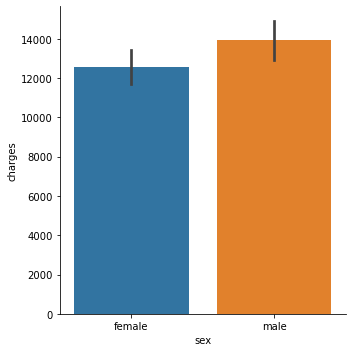

In [9]:
sns.catplot(data=data, x="sex", y="charges", kind="bar")

### 2. Mana yang lebih tinggi proporsi perokok atau non perokok?

In [10]:
count_rokok = (data['smoker']).value_counts()
print(f"Jumlah proporsi perokok dan non-perokok :{count_rokok}")

Jumlah proporsi perokok dan non-perokok :no     1064
yes     274
Name: smoker, dtype: int64


<AxesSubplot:xlabel='smoker', ylabel='count'>

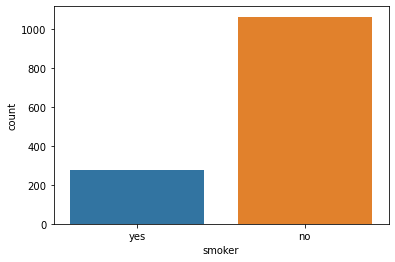

In [11]:
sns.countplot(x=data['smoker'])

### 3. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [12]:
proporsi_region = (data['region']).value_counts()
print(f"Jumlah pengguna tiap region :{proporsi_region}")

Jumlah pengguna tiap region :southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='count'>

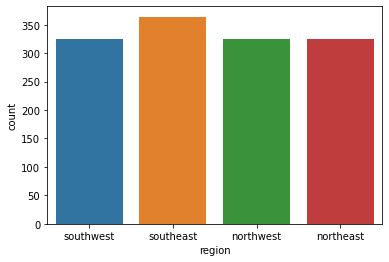

In [13]:
sns.countplot(x=data['region'])

### 4. Distribusi peluang tagihan di tiap-tiap region

C:\Users\adity\AppData\Local\Temp\ipykernel_19012\562132947.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


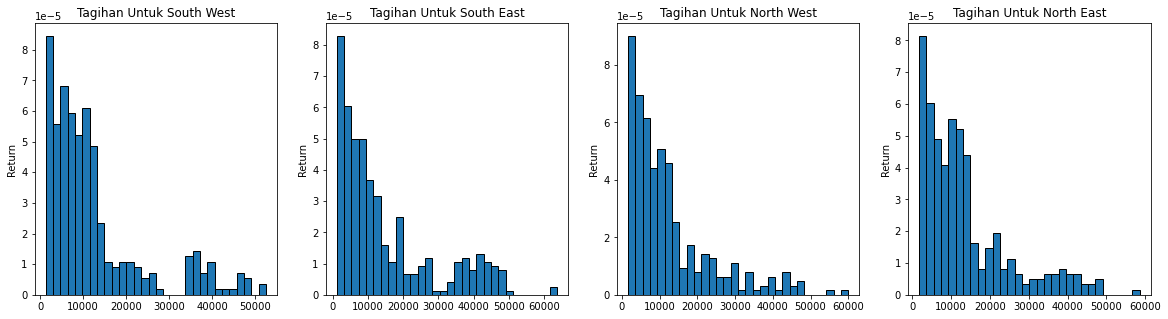

In [14]:
a = data.loc[data['region'] == "southwest"]
b = data.loc[data['region'] == "southeast"]
c = data.loc[data['region'] == "northwest"]
d = data.loc[data['region'] == "northeast"]
fig=plt.figure (figsize=(20,5))
axes1=fig.add_subplot(1,4,1)
axes1.hist(a['charges'],bins=30,density=True, edgecolor="black" )
axes1.set_title("Tagihan Untuk South West")
axes1.set_ylabel("Return")
axes2=fig.add_subplot(1,4,2)
axes2.hist(b['charges'],bins=30,density=True, edgecolor="black" )
axes2.set_title("Tagihan Untuk South East")
axes2.set_ylabel("Return")
axes3=fig.add_subplot(1,4,3)
axes3.hist(c['charges'],bins=30,density=True, edgecolor="black" )
axes3.set_title("Tagihan Untuk North West")
axes3.set_ylabel("Return")
axes4=fig.add_subplot(1,4,4)
axes4.hist(d['charges'],bins=30,density=True, edgecolor="black" )
axes4.set_title("Tagihan Untuk North East")
axes4.set_ylabel("Return")
fig.show()

### 5. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [15]:
# P(Male & Smoke) = Jumlah(Male & Smoke)/Jumlah data
Jumlah_Male_dan_Merokok = data.loc[(data['sex'] == "male") & (data['smoker'] == 'yes')]
Peluang = len(Jumlah_Male_dan_Merokok)/len(data)
print("Peluang Seseorang Laki Laki dan Perokok adalah : ", Peluang)

Peluang Seseorang Laki Laki dan Perokok adalah :  0.11883408071748879


---
## Langkah 3 - Analisa Variabel Kontinu

1. Mana yang lebih mungkin terjadi

a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,

atau

b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [16]:
# P(BMI>25|Charges>16.7k) = P(BMI>25 & Charges>16.7k)/P(Charges>16.7k)
# P(BMI<25|Charges>16.7k) = P(BMI>25 & Charges>16.7k)/P(Charges>16.7k)
BMI1 = data.loc[(data['bmi'] > 25) & (data['charges'] >16700)]
BMI2 = data.loc[(data['bmi'] < 25) & (data['charges'] >16700)]
Tagihan = data.loc[data['charges'] >16700]
Peluang_BMI1 = (len(BMI1)/len(data))/(len(Tagihan)/len(data))
Peluang_BMI2 = (len(BMI2)/len(data))/(len(Tagihan)/len(data))
print("Peluang Seseorang BMI di atas 25 mendapat Tagihan kesehatan diatas 16.7k adalah : ", Peluang_BMI1)
print("Peluang Seseorang BMI di bawah 25 mendapat Tagihan kesehatan diatas 16.7k adalah : ", Peluang_BMI2)
if Peluang_BMI1 > Peluang_BMI2:
  print("Yang lebih mungkin adalah BMI diatas 25 mendapat tagihan diatas 16.7k")
else:
  print("Yang lebih mungkin adalah BMI dibawah 25 mendapat tagihan diatas 16.7k")

Peluang Seseorang BMI di atas 25 mendapat Tagihan kesehatan diatas 16.7k adalah :  0.8473053892215568
Peluang Seseorang BMI di bawah 25 mendapat Tagihan kesehatan diatas 16.7k adalah :  0.1526946107784431
Yang lebih mungkin adalah BMI diatas 25 mendapat tagihan diatas 16.7k


2. Mana yang lebih mungkin terjadi

a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k, 

atau

b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k

In [17]:
# P((Smoker & BMI>25)|Charges>16.7k) = P((Smoker & BMI>25) & Charges>16.7k)/P(Charges>16.7k)
# P((Non_Smoker & BMI<25)|Charges>16.7k) = P((Smoker & BMI>25) & Charges>16.7k)/P(Charges>16.7k)
BMI1 = data.loc[(data['smoker'] == 'yes') & (data['bmi'] > 25) & (data['charges'] > 16700)]
BMI2 = data.loc[(data['smoker'] == 'no') & (data['bmi'] > 25) & (data['charges'] > 16700)]
Tagihan = data.loc[data['charges'] >16700]
Peluang_BMI1 = (len(BMI1)/len(data))/(len(Tagihan)/len(data))
Peluang_BMI2 = (len(BMI2)/len(data))/(len(Tagihan)/len(data))
print("Peluang Seseorang Perokok dengan BMI di atas 25 dan Tagihan kesehatan diatas 16.7k adalah : ", Peluang_BMI1)
print("Peluang Seseorang Non Perokok dengan BMI di atas 25 dan Tagihan kesehatan diatas 16.7k adalah : ", Peluang_BMI2)
if Peluang_BMI1 > Peluang_BMI2:
  print("Yang lebih mungkin adalah Perokok dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k")
else:
  print("Yang lebih mungkin adalah Non Perokok dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k")

Peluang Seseorang Perokok dengan BMI di atas 25 dan Tagihan kesehatan diatas 16.7k adalah :  0.6437125748502994
Peluang Seseorang Non Perokok dengan BMI di atas 25 dan Tagihan kesehatan diatas 16.7k adalah :  0.20359281437125748
Yang lebih mungkin adalah Perokok dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k


---
## Langkah 4 - Analisa Korelasi Variabel

Setelah menjawab kondisi-kondisi yang lebih mungkin memiliki tagihan kesehatan yang tinggi
dari langkah sebelumnya. Kita juga dapat mencari keterhubungan antara kondisi-kondisi
tersebut dengan tagihan kesehatan. Analisa korelasi akan diperlukan disini. Anda bisa memilih
mengecek korelasi tagihan kesehatan minimal dengan 2 variabel lainnya.

In [42]:
corr = data[['bmi', 'children', 'age', 'charges']].corr()
corr.style.background_gradient(cmap='coolwarm')

,bmi,children,age,charges
bmi,1.000000,0.012759,0.109272,0.198341
children,0.012759,1.000000,0.042469,0.067998
age,0.109272,0.042469,1.000000,0.299008
charges,0.198341,0.067998,0.299008,1.000000


Dalam masalah ini kami ingin menganalisa korelasi 3 variabel numerik yaitu ```bmi```, ```children```dan ```age``` terhadap tagihan kesehatan. Didapatkan dari plot matriks korelasi bahwa variabel age memiliki korelasi positif yang cukup tinggi dibanding 2 variabel lainnya yaitu sebesar 0.299, yang dapat kita artikan bahwa umur dari seseorang menjadi salah satu parameter penting yang mempengaruhi besarnya tagihan yang diberikan.


---
## Langkah 5 - Pengujian Hipotesis

### 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok


###Null Hypothesis
H0 : Tagihan untuk perokok sama dengan Tagihan untuk Non-perokok

###Alternatif Hypothesis
H1 : Tagihan non-perokok berbeda secara signifikan dari Tagihan perokok

Terdapat 3 langka untuk Menjawab pertanyaan ini
- Langkah Pertama\
Mengecek asumsi dasar dari hypothesis

- Langkah ke dua\
Melakukan uji-t arah kanan

- Langkah ke tiga\
Mengecek hasil hypothesis

In [19]:
#Keputusan
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS') 

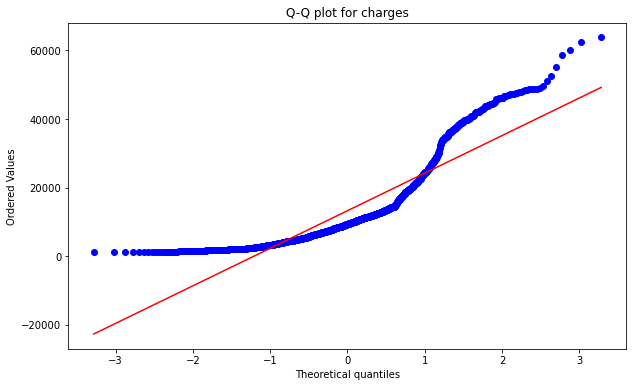

In [20]:
plt.figure(figsize=(10,6))
stats.probplot(data['charges'], plot= plt, dist="norm")
plt.title('Q-Q plot for charges')
plt.show()

In [21]:
from scipy.stats import levene
smokers = data[data['smoker']=='yes']['charges']
non_smokers = data[data['smoker']=='no']['charges']
stat,p = levene(smokers,non_smokers)

In [22]:
print('P-value :',p)

P-value : 1.5593284881803726e-66


In [23]:
htResult(p)

Reject NULL HYPOTHESIS


hipotesis nol ditolak, yang berarti varian tidak sama.

In [24]:
st,p = stats.ttest_ind(smokers,non_smokers)
print('P-value :',(p/2))

P-value : 4.135717921089551e-283


In [25]:
htResult(p/2)

Reject NULL HYPOTHESIS


Kita menolak null hypothesis, yang artinya Tagihan untuk perokok lebih tinggi daripada tagihan non-perokok

### 2. Proporsi perokok laki laki lebih besar dari perempuan

###Chi-Square test
Null Hypothesis ( H0 ) - Proporsi perokok laki-laki sama dengan proporsi perokok perempuan.

Alternate Hypothesis ( HA ) - Proporsi perokok laki-laki lebih besar daripada perempuan.

- Langkah Pertama\
chi-square test

- Langkah Kedua\
Cek hasil hypothesis

In [26]:
cont = pd.crosstab(data['smoker'],data['sex'])
value = np.array([cont.iloc[0][0:2].values,cont.iloc[1][0:2].values])

In [27]:
c, p, dof, expected = stats.chi2_contingency(value)
print('P-value :',p)

P-value : 0.006548143503580696


In [28]:
htResult(p)

Reject NULL HYPOTHESIS


Reject Null Hypothesis yang artinya bahwa proporsi perokok laki-laki lebih besar dari perempuan

### 3. Tagihan kesehatan laki-laki lebih besar dari perempuan
Null Hypothesis ( H0 ) - Tagihan laki-laki sama dengan tagihan perempuan

Alternate Hypothesis ( HA ) - Tagihan laki-laki lebih besar dari pada perempuan

###Terdapat 3 langka untuk Menjawab pertanyaan ini
- Langkah Pertama\
Mengecek asumsi dasar dari hypothesis

- Langkah ke dua\
Melakukan uji-t arah kanan

- Langkah ke tiga\
Mengecek hasil hypothesis

In [29]:
from scipy.stats import levene
male = data[data['sex']=='male']['charges']
female = data[data['sex']=='female']['charges']
stat,p = levene(male,female)

In [30]:
print('P-value :',p)

P-value : 0.0016808765833903443


In [31]:
htResult(p)

Reject NULL HYPOTHESIS


hipotesis nol ditolak, yang berarti varian tidak sama.
###Melakukan uji-t arah kanan

In [32]:
st,p = stats.ttest_ind(male,female)
print('P-value :',(p/2))

P-value : 0.01806636050296488


In [33]:
htResult(p/2)

Reject NULL HYPOTHESIS


Gagal untuk menolak Null Hypothesis yang artinya tagihan laki-laki sama dengan tagihan perempuan tidak ada perbedaan